[[-87.68517221  41.9815098 ]
 [-87.61939699  41.80329283]
 [-87.63124599  41.69673929]
 [-87.66469256  41.77287205]
 [-87.70957812  41.87814737]
 [-87.58244223  41.75246065]
 [-87.75699302  41.89339433]]
[[-87.66413895  41.77635072]
 [-87.5802589   41.75068766]
 [-87.61788511  41.79220178]
 [-87.71055615  41.87508047]
 [-87.6351828   41.70544713]
 [-87.68522419  41.98536496]
 [-87.75477357  41.89007792]]


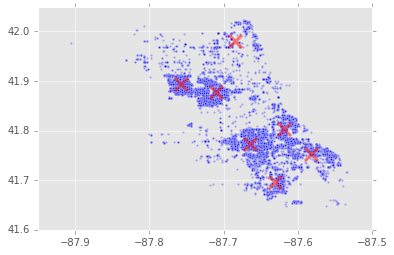

In [10]:
#
# TOOD: Import whatever needs to be imported to make this work
#
# .. your code here ..
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.style.use('ggplot') # Look Pretty


#
# TODO: To procure the dataset, follow these steps:
# 1. Navigate to: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2
# 2. In the 'Primary Type' column, click on the 'Menu' button next to the info button,
#    and select 'Filter This Column'. It might take a second for the filter option to
#    show up, since it has to load the entire list first.
# 3. Scroll down to 'GAMBLING'
# 4. Click the light blue 'Export' button next to the 'Filter' button, and select 'Download As CSV'



def doKMeans(df):
  #
  # INFO: Plot your data with a '.' marker, with 0.3 alpha at the Longitude,
  # and Latitude locations in your dataset. Longitude = x, Latitude = y
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)

  #
  # TODO: Filter df so that you're only looking at Longitude and Latitude,
  # since the remaining columns aren't really applicable for this purpose.
  #
  # .. your code here ..
  df = df.loc[:, ("Longitude", "Latitude")]
  #
  # TODO: Use K-Means to try and find seven cluster centers in this df.
  #
  # .. your code here ..
  from sklearn.cluster import KMeans
  kmeans_model = KMeans(n_clusters = 7, init = 'random', n_init = 60, max_iter = 360, random_state = 43).fit(df)
  labels = kmeans_model.fit_predict(df)
  #
  # INFO: Print and plot the centroids...
  
  centroids = kmeans_model.cluster_centers_
  ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
  print centroids



#
# TODO: Load your dataset after importing Pandas
#
# .. your code here ..
import pandas as pd
df = pd.read_csv("datasets/crime.csv")

#
# TODO: Drop any ROWs with nans in them
#
# .. your code here ..
df.dropna(axis=0, how = 'any', inplace=True)

#
# TODO: Print out the dtypes of your dset
#
# .. your code here ..
df.head()

#
# Coerce the 'Date' feature (which is currently a string object) into real date,
# and confirm by re-printing the dtypes. NOTE: This is a slow process...
#
# .. your code here ..
df.Date = pd.to_datetime(df.Date)

# INFO: Print & Plot your data
doKMeans(df)


#
# TODO: Filter out the data so that it only contains samples that have
# a Date > '2011-01-01', using indexing. Then, in a new figure, plot the
# crime incidents, as well as a new K-Means run's centroids.
#
# .. your code here ..
df = df.loc[(df.Date > '2011-01-01')]


# INFO: Print & Plot your data
doKMeans(df)
plt.title("Dates limited to 2011 and later")
plt.show()